In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(Data[:, 0])
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [12]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 0.6 
n_lin_guess = 21e-7
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 0.7
n_quad_guess = 21e-7
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

Linear Parameters:
Amplitude: -0.0031764777576331798 $\pm$ 0.005145140382690316
n: 1.3000000199841277 $\pm$ 2.870681564584959e-07
Offset: 14.11749907108928 $\pm$ 0.003632738712749297

Quadratic Parameters:
Amplitude: -0.012638977817174015 +/- [0]
n: 1.300000031958514 +/- 6.27018534036193e-08
Offset: 14.117488527412885 +/- 0.0036329959826481395
m: 1.782042705090107e-07 +/- 2.9507990405909303e-07


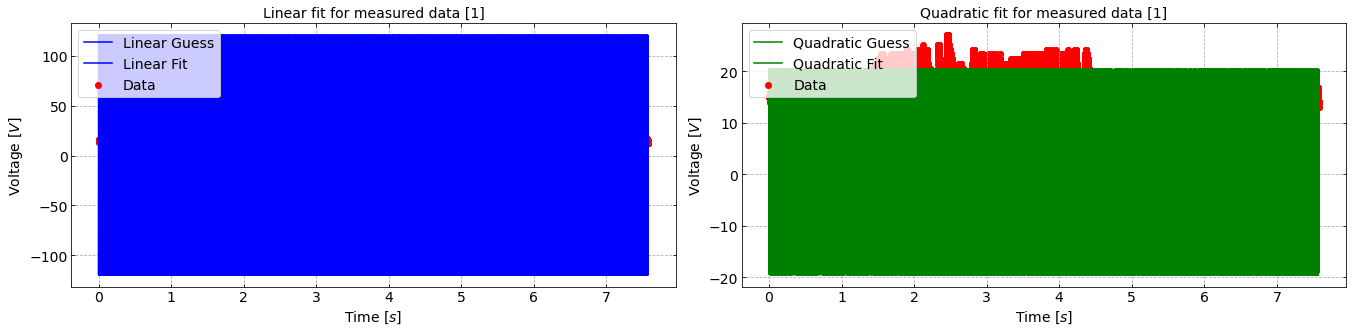

Linear Parameters:
Amplitude: -0.0012379402940129417 $\pm$ 0.005215684017511036
n: 1.300000546386955 $\pm$ 8.33883862393368e-07
Offset: 14.399650014578995 $\pm$ 0.003682847825199443

Quadratic Parameters:
Amplitude: -0.02028199470215818 +/- [0]
n: 1.3000000814273698 +/- 2.2014119513649428e-08
Offset: 14.399740818405839 +/- 0.0036831819979476206
m: -2.557054014185382e-07 +/- 1.1509611331264321e-07


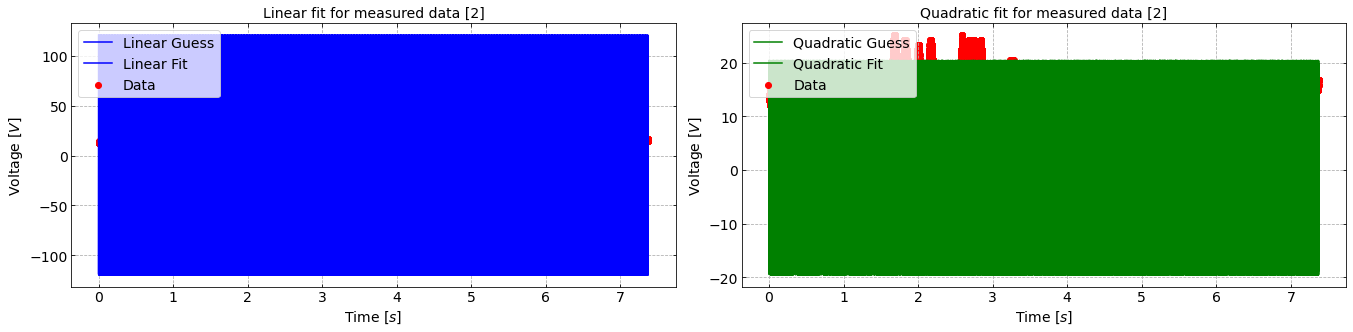

Linear Parameters:
Amplitude: -0.0001588755893044376 $\pm$ 0.005327274913407259
n: 1.2999998219062088 $\pm$ 1.2519581276161795e-05
Offset: 14.007535628516983 $\pm$ 0.0037620579196286177

Quadratic Parameters:
Amplitude: 0.012028901867107703 +/- [0]
n: 1.300000033119758 +/- 2.2545026411770852e-08
Offset: 14.00745781280291 +/- 0.0037626259762506427
m: -1.1645703204624454e-08 +/- 8.482029139289336e-08


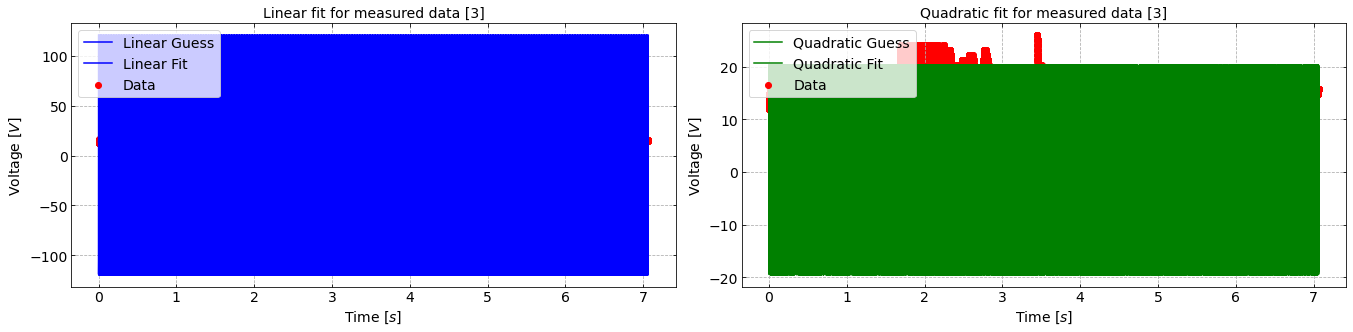

Linear Parameters:
Amplitude: 0.00028334968027490717 $\pm$ 0.004889390043515643
n: 1.300000143027565 $\pm$ 2.216696171130443e-06
Offset: 11.978471987538475 $\pm$ 0.0034509852005655366

Quadratic Parameters:
Amplitude: -0.07132418040215688 +/- [0]
n: 1.300000014128702 +/- 2.0658077850157916e-09
Offset: 11.979001376102929 +/- 0.0034512270560271003
m: -4.21451775714977e-09 +/- 4.70948567002997e-09


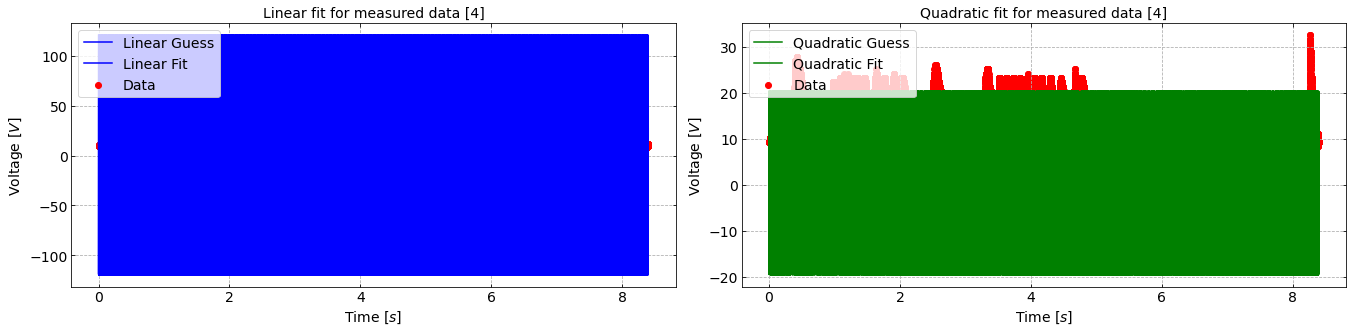

Linear Parameters:
Amplitude: 0.00021208449375365035 $\pm$ 0.004668780982418735
n: 1.3000000000007879 $\pm$ 3.210475179356985e-06
Offset: 13.721910300615423 $\pm$ 0.0032940392167644487

Quadratic Parameters:
Amplitude: -0.03764073667162358 +/- [0]
n: 1.3000000091353145 +/- 2.7505487745308536e-09
Offset: 13.722233961675107 +/- 0.0032942970642625756
m: 3.732445435144355e-09 +/- 8.978235568629691e-10


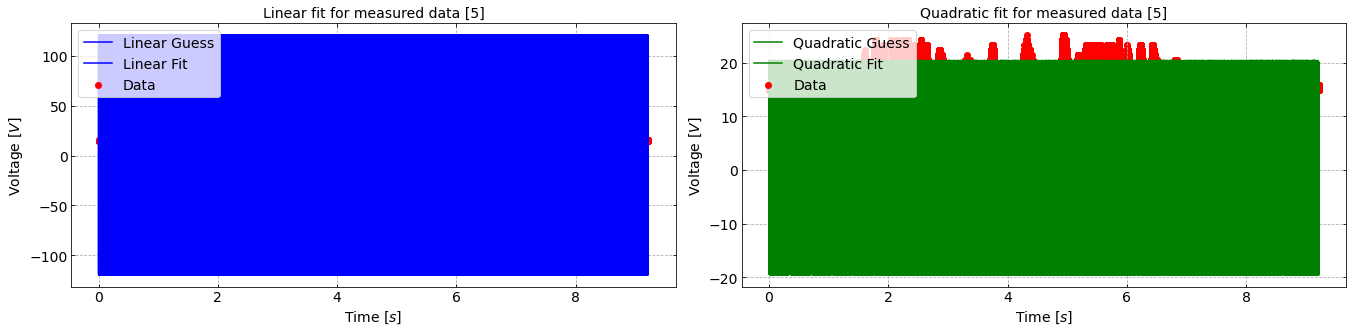

Linear Parameters:
Amplitude: 0.0006616036269505288 $\pm$ 0.004569284112488605
n: 1.3000000660546163 $\pm$ 9.637363769615181e-07
Offset: 13.649128823885139 $\pm$ 0.003223191383147777

Quadratic Parameters:
Amplitude: 0.00040536207319163964 +/- [0]
n: 1.2999999999696823 +/- 2.6842751052680785e-07
Offset: 13.649016921875953 +/- 0.003223425897021831
m: 1.9738050279516788e-10 +/- 1.3077684491865707e-07


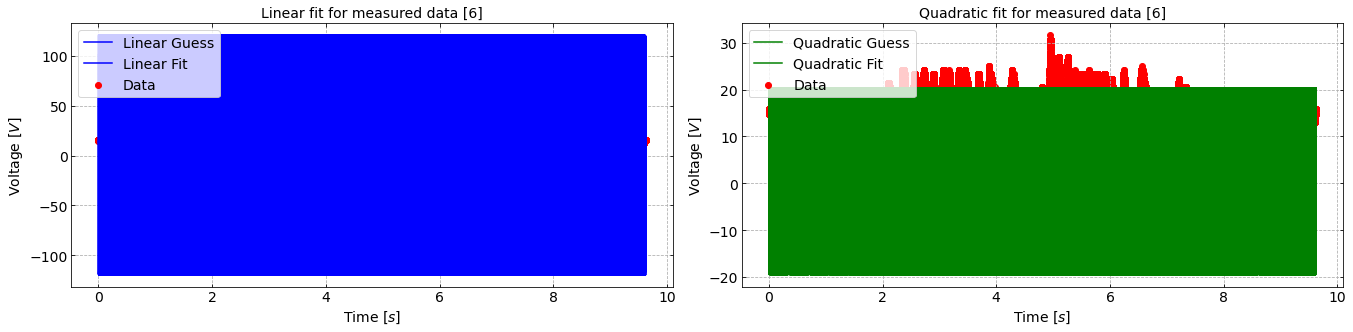

Linear Parameters:
Amplitude: -0.0015720955615753291 $\pm$ 0.004483697037254653
n: 1.3000000666399196 $\pm$ 3.8392306115928364e-07
Offset: 13.507104843144726 $\pm$ 0.0031622144259078654

Quadratic Parameters:
Amplitude: 0.06321116917024305 +/- [0]
n: 1.3000000153473856 +/- 1.7256519001855628e-09
Offset: 13.506762048601077 +/- 0.0031624161701231416
m: 6.572937702348676e-09 +/- 4.7713156918283074e-09


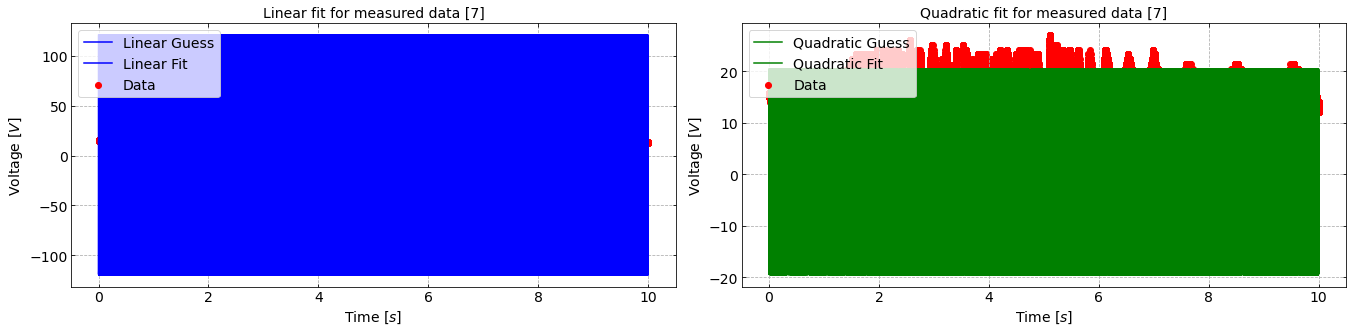

Linear Parameters:
Amplitude: -0.002913638698125959 $\pm$ 0.004618212610312678
n: 1.300000039515046 $\pm$ 2.2614876058432398e-07
Offset: 13.554795557629017 $\pm$ 0.003258037733925521

Quadratic Parameters:
Amplitude: 0.0007930543553976085 +/- [0]
n: 1.3000000587921254 +/- 2.254705448737784e-07
Offset: 13.554693064917839 +/- 0.003258038151777835
m: 7.967370543920156e-08 +/- 1.2985561937685231e-06


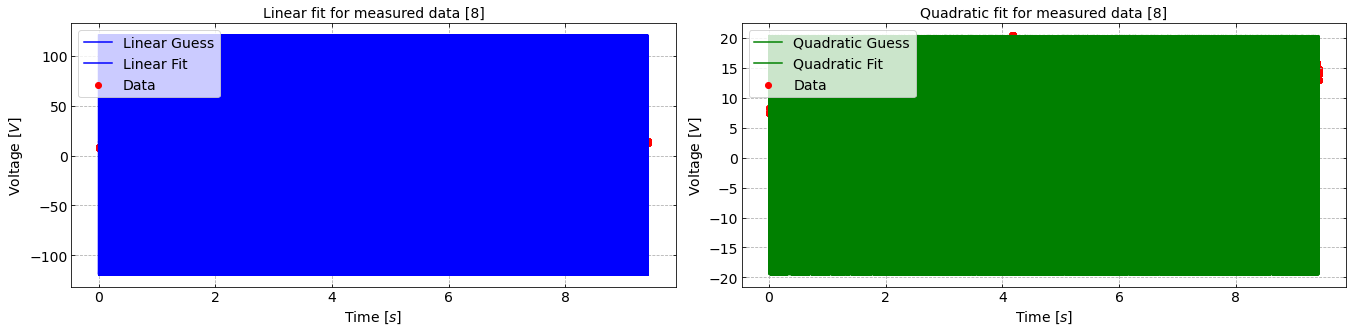

Linear Parameters:
Amplitude: -0.002561991485014471 $\pm$ 0.0044836761877320485
n: 1.3000001480871617 $\pm$ 2.789199136546142e-07
Offset: 13.743217780905134 $\pm$ 0.003162214405191437

Quadratic Parameters:
Amplitude: 0.025290019401937265 +/- [0]
n: 1.2999999756242728 +/- 1.2179486739980856e-08
Offset: 13.743150868445182 +/- 0.0031624500749269677
m: 2.5901614214500928e-08 +/- 7.385370044809866e-09


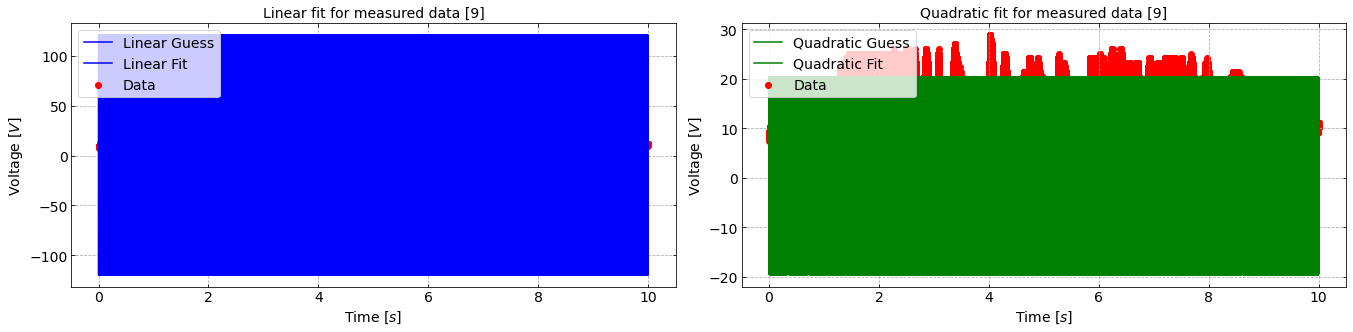

Linear Parameters:
Amplitude: -0.0036049823128743446 $\pm$ 0.01104909896159867
n: 1.3000007246618765 $\pm$ 2.5186182000558964e-06
Offset: 14.624986398462937 $\pm$ 0.007812500063462093

Quadratic Parameters:
Amplitude: -0.014009801214747774 +/- [0]
n: 1.299999970515579 +/- 2.0317268496349438e-06
Offset: 14.625113235024479 +/- 0.00781327557411191
m: -6.319100840176311e-07 +/- 2.5802993948872833e-06


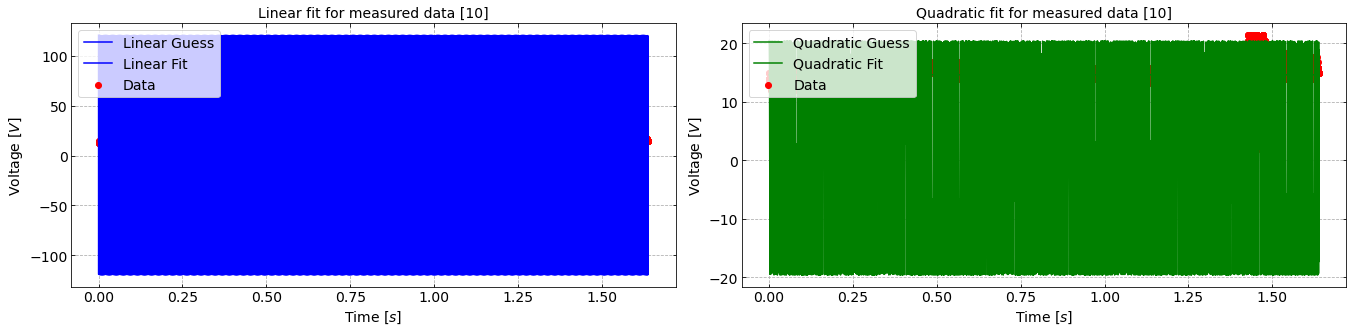

Linear Parameters:
Amplitude: -0.0033213840940078112 $\pm$ 0.008208385681677203
n: 1.3000000795322888 $\pm$ 1.1371733044116335e-06
Offset: 13.536915321045498 $\pm$ 0.005802979352071947

Quadratic Parameters:
Amplitude: 0.021918416429255187 +/- [0]
n: 1.2999999110075469 +/- 2.862912829273856e-07
Offset: 13.536750761779091 +/- 0.005803385075647969
m: -1.77545447626997e-07 +/- 6.567803081592978e-07


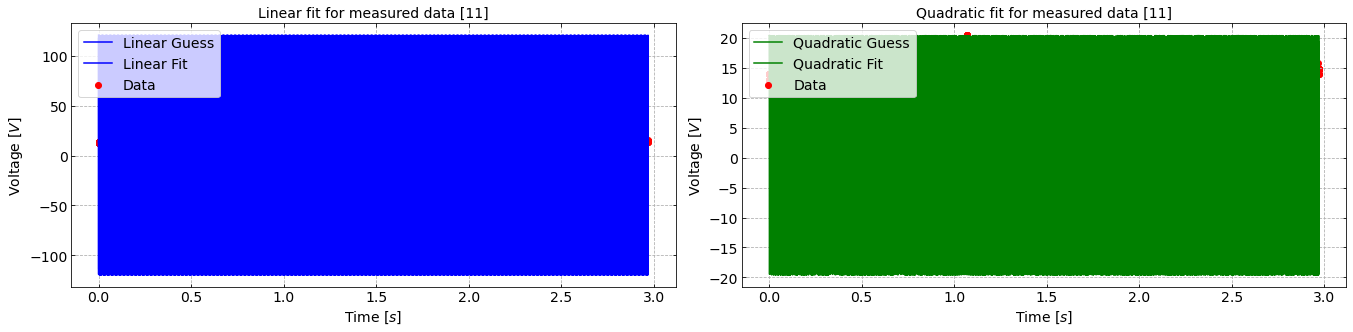

Linear Parameters:
Amplitude: 0.000799638994536167 $\pm$ 0.004483696607393561
n: 1.2999999999994565 $\pm$ 7.53781602069875e-07
Offset: 12.486040988084904 $\pm$ 0.0031622144269848104

Quadratic Parameters:
Amplitude: -0.002062745100454528 +/- [0]
n: 1.3000000093755808 +/- 6.124840192853948e-09
Offset: 12.486022965248127 +/- 0.003162429482417882
m: 1.4708674393800359e-08 +/- 3.428549713843238e-09


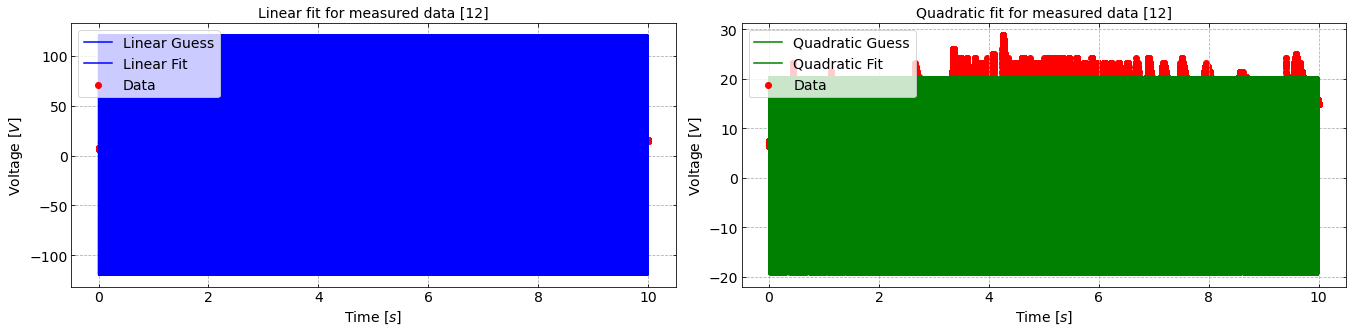

Linear Parameters:
Amplitude: -0.0014654788022751733 $\pm$ 0.005180025158293815
n: 1.3000001833484827 $\pm$ 1.055554568327703e-06
Offset: 13.878401653622753 $\pm$ 0.0036575358588934203

Quadratic Parameters:
Amplitude: 0.0029786166520298293 +/- [0]
n: 1.3000000085072203 +/- 1.3470505670785637e-08
Offset: 13.878393658726251 +/- 0.0036578261031748136
m: 1.6341552471862776e-08 +/- 9.499252777168074e-09


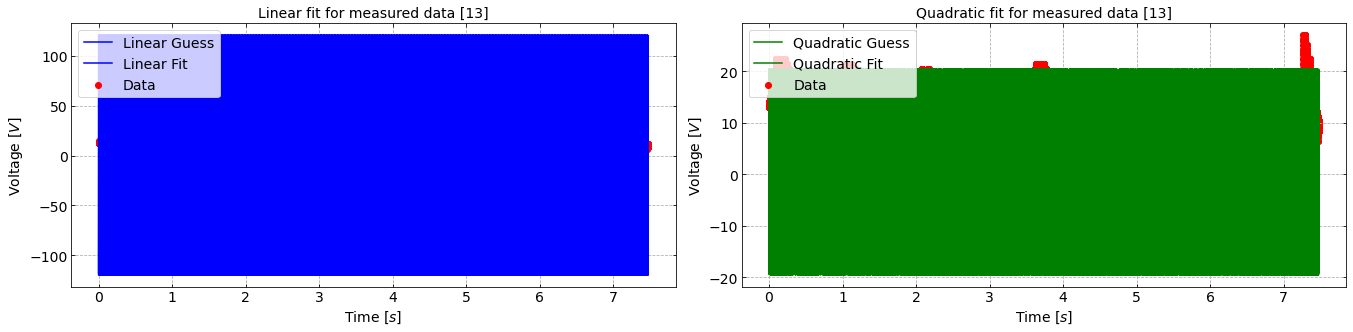

Linear Parameters:
Amplitude: -0.004666398574703715 $\pm$ 0.004483690406858383
n: 1.300000096948718 $\pm$ 1.3612742441535893e-07
Offset: 14.039974766469676 $\pm$ 0.0031622144078801

Quadratic Parameters:
Amplitude: 0.023413504214541803 +/- [0]
n: 1.3000000591355592 +/- 3.8110882846677675e-09
Offset: 14.039953608978474 +/- 0.0031622176064475256
m: -9.301715788942474e-08 +/- 2.177883618662471e-08


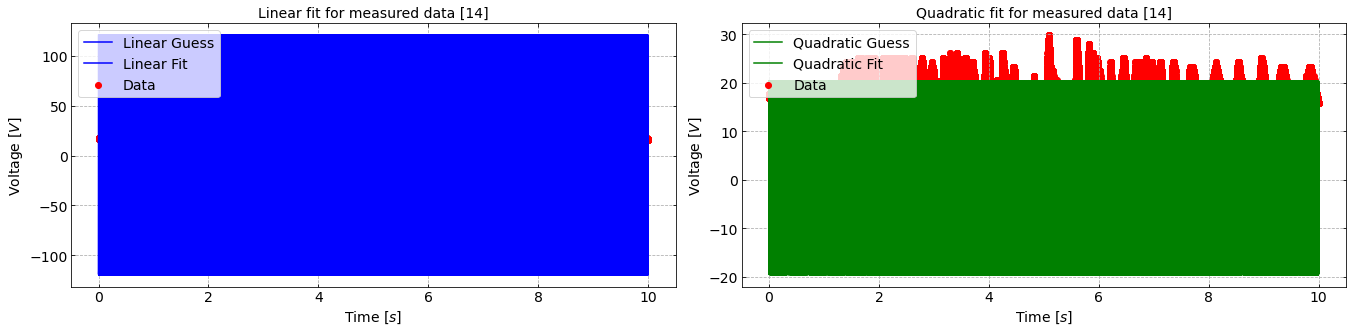

Linear Parameters:
Amplitude: -0.0017045409084009786 $\pm$ 0.00466877015262663
n: 1.2999999161497164 $\pm$ 4.530673341084164e-07
Offset: 13.231227026329718 $\pm$ 0.0032940392270430184

Quadratic Parameters:
Amplitude: -0.004724181989892437 +/- [0]
n: 1.3000000515123915 +/- 3.574757196635205e-08
Offset: 13.231244268609865 +/- 0.0032941342913065394
m: -2.528995044237723e-08 +/- 1.864933915592068e-07


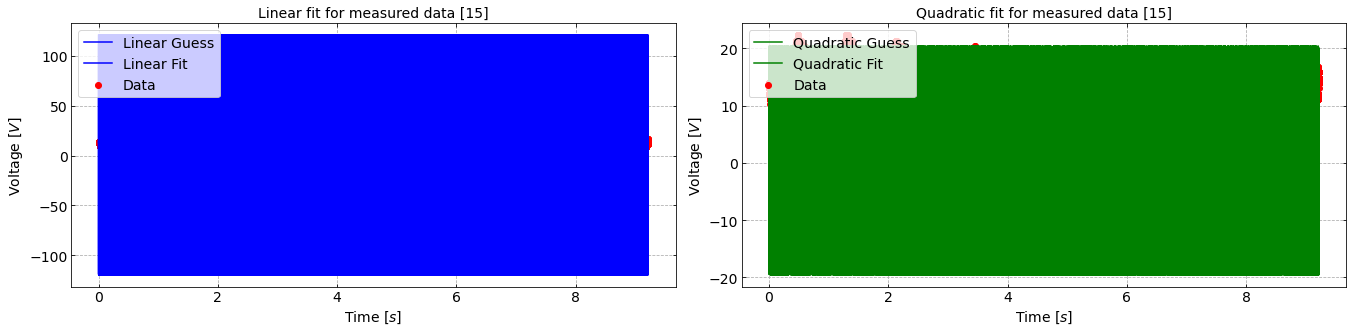

Linear Parameters:
Amplitude: -0.002087810510006238 $\pm$ 0.00448367439463671
n: 1.2999998733855784 $\pm$ 4.1723117303398604e-07
Offset: 13.19189775997102 $\pm$ 0.00316221441596831

Quadratic Parameters:
Amplitude: 0.014586633998402685 +/- [0]
n: 1.2999999763033974 +/- 8.515818813540614e-09
Offset: 13.191714068440438 +/- 0.0031623949406256653
m: 2.9725155361276265e-07 +/- 4.919669198597813e-08


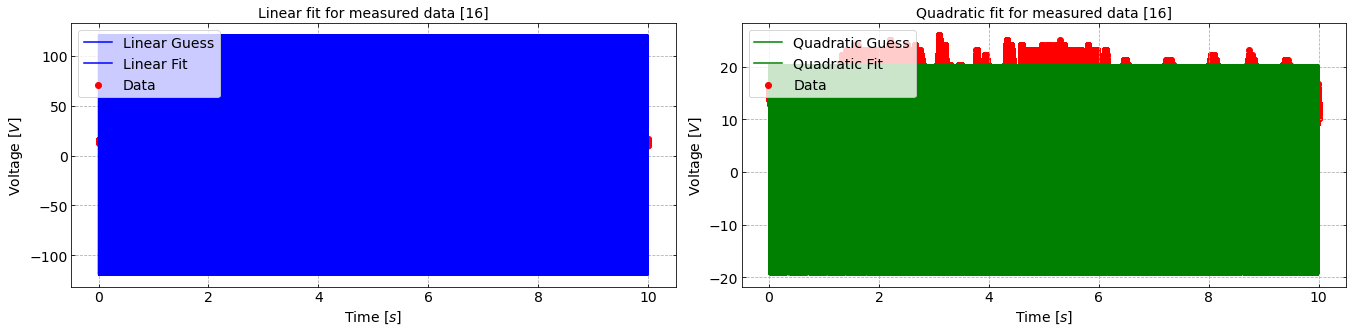

Linear Parameters:
Amplitude: -0.00035621227983134593 $\pm$ 0.00448370000040503
n: 1.3000001569937158 $\pm$ 1.670580959050573e-06
Offset: 14.327941404370245 $\pm$ 0.003162214406784246

Quadratic Parameters:
Amplitude: -0.006070241818246558 +/- [0]
n: 1.2999999999944634 +/- 1.6871911392844278e-08
Offset: 14.3279909216608 +/- 0.003162517749468134
m: -1.1217385829472652e-10 +/- 6.350898860324582e-09


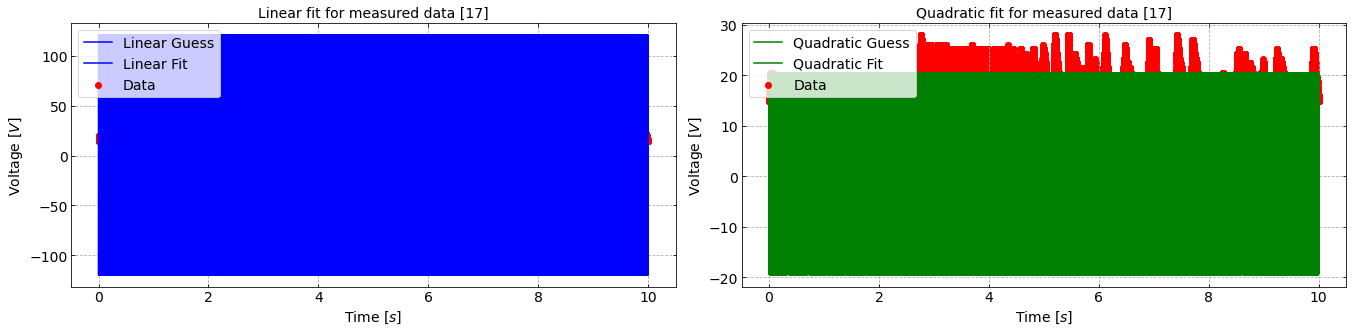

Linear Parameters:
Amplitude: -0.0002886845595782006 $\pm$ 0.004775205313545668
n: 1.2999999999998186 $\pm$ 2.5242816506930054e-06
Offset: 13.637256987850305 $\pm$ 0.003369774165690868

Quadratic Parameters:
Amplitude: 0.008987244197774979 +/- [0]
n: 1.2999999986736535 +/- 4.824439402350807e-09
Offset: 13.637182292030067 +/- 0.0033700420475587223
m: 4.405817339799278e-09 +/- 3.5102586926887402e-09


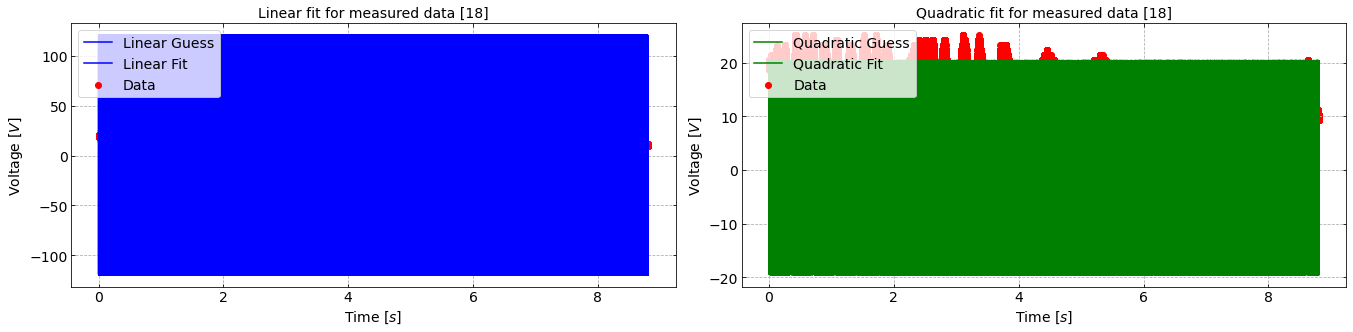

Linear Parameters:
Amplitude: -0.0006910055232106054 $\pm$ 0.004483695622756049
n: 1.300000112168902 $\pm$ 8.777022073799963e-07
Offset: 14.040881078777819 $\pm$ 0.0031622144199521134

Quadratic Parameters:
Amplitude: -0.04017202455116137 +/- [0]
n: 1.300000045956547 +/- 2.0599757363029524e-09
Offset: 14.040756790898106 +/- 0.003162261694631116
m: 2.5589290360920578e-08 +/- 5.151049785039129e-09


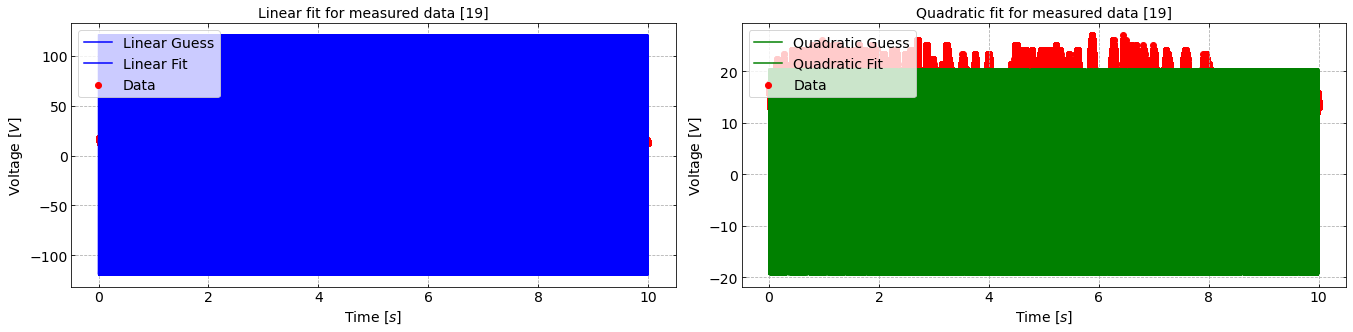

Linear Parameters:
Amplitude: -0.002855036412300919 $\pm$ 0.013324925978012383
n: 1.3000011017865218 $\pm$ 5.585694694415361e-06
Offset: 11.517046482298435 $\pm$ 0.009422229726758297

Quadratic Parameters:
Amplitude: -0.09911849999725872 +/- [0]
n: 1.2999929620402693 +/- 7.334300563339303e-07
Offset: 11.516809748557536 +/- 0.009423759215337854
m: 7.365578639612578e-06 +/- 6.382437448283471e-07


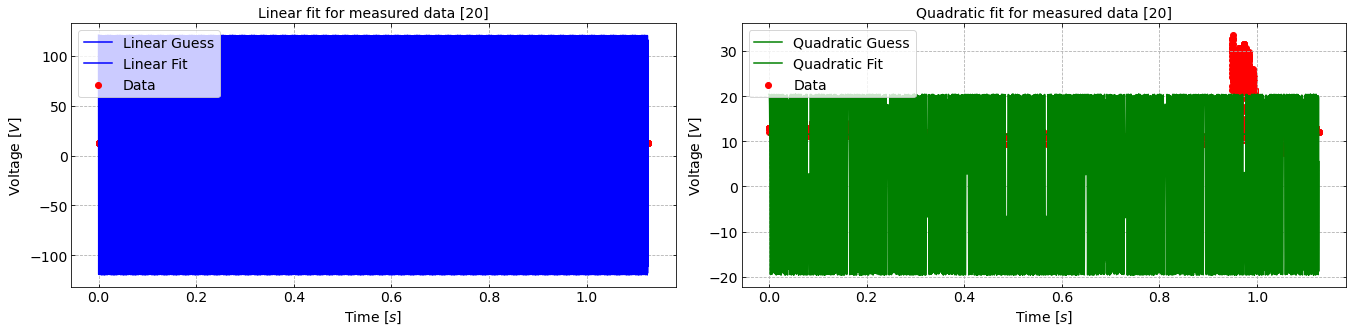

In [9]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

#Here is my loop where i plot for curve fits with different powers.
for i in range(len(time)):
    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i], V1[i], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for measured data {[i+1]}')
    plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='black')  # Plot linear fit
    plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls = '--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i], V1[i], p0=p0_Quad, absolute_sigma=True)
    #calc standard deviation of the fitted parameters
    quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='black')  # Plot quadratic fit
    plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls = '--')
    plt.tight_layout()
    
    #Print statements to get the fitted parameters
    print("Linear Parameters:")
    print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    print("n:", popt_1[1], '$\pm$', lin_err[1])
    lin_const.append(popt_1[1])
    lin_sigma.append(lin_err[1])
    print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    print("Amplitude:", popt_2[0], "+/-", [0])
    print("n:", popt_2[1], "+/-", quad_err[1])
    print("Offset:", popt_2[2], "+/-", quad_err[2])
    print("m:", popt_2[3], "+/-", quad_err[3])
    plt.show()